In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("augmented_words_df.csv")

In [6]:
df.shape

(3104, 67)

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,2,3,4,5,6,7,...,55,56,57,58,59,60,61,62,63,Word
0,0,0,0.281080,0.785070,1.588461e-07,0.277660,0.759269,-0.009657,0.266050,0.738115,...,0.794348,-0.005122,0.210189,0.789483,-0.006075,0.201289,0.783234,-0.006542,0.072552,A LOT
1,1,1,0.663690,0.894299,8.018031e-08,0.670382,0.868997,-0.017688,0.685768,0.851407,...,0.915870,-0.008087,0.748309,0.916358,-0.010335,0.758745,0.916090,-0.011643,0.093832,A LOT
2,2,3,0.680567,0.839997,1.026588e-07,0.685946,0.813674,-0.015009,0.701091,0.794908,...,0.846997,-0.011000,0.762835,0.843248,-0.013924,0.773743,0.838970,-0.015680,0.085177,A LOT
3,3,4,0.694425,0.883991,9.631631e-08,0.698218,0.855003,-0.016717,0.710920,0.831180,...,0.895405,-0.013250,0.776406,0.890875,-0.015874,0.786860,0.883967,-0.017087,0.088201,A LOT
4,4,5,0.323472,0.727019,1.185023e-07,0.319189,0.704968,-0.003473,0.307335,0.687577,...,0.721823,-0.005233,0.264031,0.707412,-0.004767,0.264934,0.695965,-0.004344,0.048560,A LOT


In [8]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], inplace=True, axis=1)

In [9]:
df.shape

(3104, 65)

In [12]:
category_data = df["Word"]
numeric_data = df.drop("Word", axis=1)

In [13]:
print(numeric_data.shape)
print(category_data.shape)

(3104, 64)
(3104,)


#### Applying PCA to reduce the dimensions

In [10]:
pca = PCA()

In [14]:
pca.fit(numeric_data)

PCA()

In [17]:
pca.explained_variance_ratio_

array([7.12204989e-01, 2.61689162e-01, 6.61782748e-03, 5.35923372e-03,
       4.63100909e-03, 2.92750335e-03, 2.73123793e-03, 1.07123611e-03,
       6.93860734e-04, 4.85931522e-04, 3.52290161e-04, 2.52411750e-04,
       2.19519469e-04, 1.80686071e-04, 1.15872996e-04, 9.08463570e-05,
       7.14015876e-05, 5.81088027e-05, 5.14566944e-05, 4.23086748e-05,
       3.70988553e-05, 2.45372915e-05, 1.68668217e-05, 1.24717646e-05,
       9.60740180e-06, 8.63484330e-06, 8.11941208e-06, 5.62155919e-06,
       4.81362260e-06, 4.51052135e-06, 3.59827343e-06, 2.83131958e-06,
       2.06882376e-06, 1.91749184e-06, 1.76500280e-06, 1.58671783e-06,
       1.37060563e-06, 1.19701890e-06, 8.64762910e-07, 6.27666978e-07,
       5.86230255e-07, 5.64088283e-07, 3.85382703e-07, 3.42381687e-07,
       2.54901034e-07, 2.25286304e-07, 1.24527049e-07, 1.19307360e-07,
       1.01886159e-07, 6.59246470e-08, 5.21937582e-08, 4.36267181e-08,
       3.50514180e-08, 3.11967032e-08, 2.14387194e-08, 1.76933005e-08,
      

Text(0, 0.5, 'Cumulative Explained Variance')

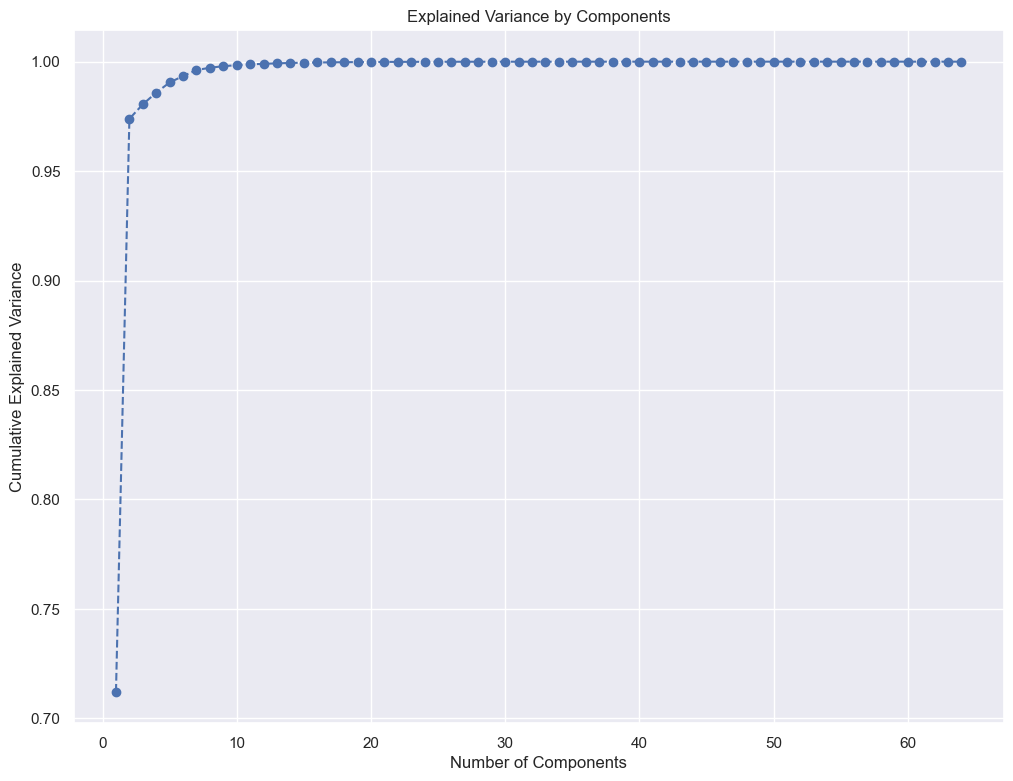

In [19]:
plt.figure(figsize = (12,9))
plt.plot(range(1,65), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

###### From above I can see that the model is explaining the variance of 100 (generally we can stop at 80-85) at 10 components only                      
##### I will be going the set the no.of components = 10

In [20]:
pca = PCA(n_components=10)
## if to optimize or can try out by parameterizing whiten=True

In [27]:
pca.fit_transform(numeric_data)

array([[ 1.15062509,  1.27318174, -0.00774292, ...,  0.03425522,
         0.01433178,  0.034387  ],
       [ 1.7712793 , -1.0397129 , -0.03288311, ...,  0.05369203,
         0.01320902,  0.06186467],
       [ 1.45958972, -1.1145489 , -0.03847516, ...,  0.05454253,
         0.00813164,  0.05192964],
       ...,
       [-0.5802967 ,  0.26559464,  0.06174877, ..., -0.10710839,
         0.0154625 ,  0.02677877],
       [-0.72948358,  1.09343308, -0.00868503, ..., -0.04125433,
        -0.00757685, -0.02698268],
       [-0.40828691, -0.01477217,  0.05288129, ..., -0.04498011,
        -0.00954168, -0.01166124]])

In [24]:
pca.fit_transform(numeric_data).shape

(3104, 10)

In [28]:
pca_scores = pca.fit_transform(numeric_data)

In [30]:
new_df = pd.DataFrame(pca_scores, 
                     columns=["Feature-1", "Feature-2", "Feature-3", "Feature-4", "Feature-5", "Feature-6", "Feature-7", "Feature-8", "Feature-9", "Feature-10"]
                     )


In [31]:
new_df.head()

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10
0,1.150625,1.273182,-0.007743,0.069023,-0.037749,-0.054296,0.022695,0.034255,0.014332,0.034387
1,1.771279,-1.039713,-0.032883,-0.093463,-0.039216,-0.010706,-0.017638,0.053692,0.013209,0.061865
2,1.459590,-1.114549,-0.038475,-0.093194,-0.033570,-0.012623,-0.021878,0.054543,0.008132,0.051930
3,1.654363,-1.163543,-0.050590,-0.086530,-0.056471,-0.009639,-0.015170,0.054248,0.005468,0.054465
4,0.853788,1.048882,-0.029100,0.051494,-0.012735,-0.074172,0.021292,0.051028,0.015016,0.005590


In [34]:
new_df["Word"] = category_data

In [35]:
new_df.head()

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,Word
0,1.150625,1.273182,-0.007743,0.069023,-0.037749,-0.054296,0.022695,0.034255,0.014332,0.034387,A LOT
1,1.771279,-1.039713,-0.032883,-0.093463,-0.039216,-0.010706,-0.017638,0.053692,0.013209,0.061865,A LOT
2,1.459590,-1.114549,-0.038475,-0.093194,-0.033570,-0.012623,-0.021878,0.054543,0.008132,0.051930,A LOT
3,1.654363,-1.163543,-0.050590,-0.086530,-0.056471,-0.009639,-0.015170,0.054248,0.005468,0.054465,A LOT
4,0.853788,1.048882,-0.029100,0.051494,-0.012735,-0.074172,0.021292,0.051028,0.015016,0.005590,A LOT


In [36]:
new_df.shape

(3104, 11)

In [37]:
new_df.to_csv("preprocessed_data.csv")